# **Анализ популярности компьютерных игр**

**Описание проекта**

Задача проекта - используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры.

В проекте выявлены параметры, определяющие успешность игры в разных регионах мира. На
основании этого подготовлен отчет для магазина компьютерных игр для планирования
рекламных кампаний. Проведена предобработка данных, анализ. Выбран актуальный
период для анализа. Составлены портреты пользователей каждого региона. Проверены
гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
средние пользовательские рейтинги жанров Action и Sports разные. При анализе был использован критерий Стьюдента для независимых выборок.

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Общая информация о данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
games = pd.read_csv('/Users/mariiapolnikova/Desktop/data analysis/games (1).csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Предобработка данных

Приведем названия столбцов к нижнему регистру.

In [6]:
games = games.rename(columns = {'Name': 'name', 'Platform': 'platform',\
                                'Year_of_Release': 'year_of_release', 'Genre': 'genre',\
                               'Other_sales': 'other_sales', 'Critic_Score': 'critic_score',\
                                'User_Score': 'user_score', 'Rating': 'rating'})

Преобразуем данные в нужные типы.

Первым делом необходимо преобразовать год выпуска игры в тип int. Сделать это не получится до тех пор, пока в столбце есть пропуски. Пропусков не так много, поэтому можем удалить данные строки из датасета.

In [7]:
games = games.dropna(subset=['year_of_release'])
games['year_of_release'] = games['year_of_release'].astype('int')

Можем также заменить оценку критиков на тип int, но надо убрать пропуски. Скорее всего там, где пропущено значение оценки экспертов, ее просто напросто нет. Заменять данные в этом столбце на среднее/медиану не целесообразно. Поэтому оставим данные того же типа

In [8]:
games[games['user_score']=='tbd']

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Вероятно, игры, у которых нет пользовательского рейтинга, еще совсем новые. Заменим tbd на nan 

In [9]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = float('nan')

In [10]:
games['user_score'] = games['user_score'].astype('float') # заменим тип данных на float для того,
#чтобы можно было проанализировать оценки пользователей

Поработаем с оставшимися пропусками

In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   NA_sales         16446 non-null  float64
 5   EU_sales         16446 non-null  float64
 6   JP_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [12]:
games[games['name'].isna()] 

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Эти строки вообще не имеют данных, можно их спокойно удалять.

In [13]:
games = games.dropna(subset=['name'])

Осталось убрать пропуски в Рейтинге. Так как переменная категориальная, можем просто заменить их на "не определен".

In [14]:
games['rating'] = games['rating'].fillna('unknown')

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [15]:
games['total_sales'] = games[['NA_sales','EU_sales','JP_sales', 'other_sales']].sum(axis = 1)

In [16]:
games.duplicated().sum() # явных дубликатов нет

0

Поищем неявные дубликаты. 

In [17]:
games['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
RP            1
AO            1
Name: rating, dtype: int64

Значения К-А и AO, можно заменить на Е, так как это старое название категории Everyone. EC значит, что игры для детей. RP значит, что рейтинг не присвоен, можем заменить на unknown

In [18]:
games['rating'] = games['rating'].replace('K-A', 'E')
games['rating'] = games['rating'].replace('AO', 'E')
games['rating'] = games['rating'].replace('RP', 'unknown')

Почти все пропущенные значения в датасете приходятся на столбцы с пользовательской оценкой, оценкой критиков и рейтингом ESRB. Пропуске существует из-за того, что какие-то игры еще не успели поучить оценку, либо слишком старые и оценки просто нет.\
Что касается рейтинга, ESRB является рейтингом Канады и США, поэтому таких оценок в Японии, напримаер, гораздо меньше.

В результате предобработки данных были исключены строки без данных, а также удалены неявные дубликаты в столбце с рейтингом. Также данные были преобразованы в верные типы и имена столбцов приведены к удобным для исследования.

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. 

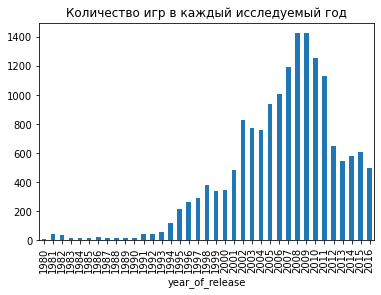

In [19]:
games.groupby('year_of_release')['name'].count().plot(kind='bar', title='Количество игр в каждый исследуемый год')
plt.ioff()

Данных об играх до 1995 года очень мало для анализа.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [20]:
platform_top10 = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index

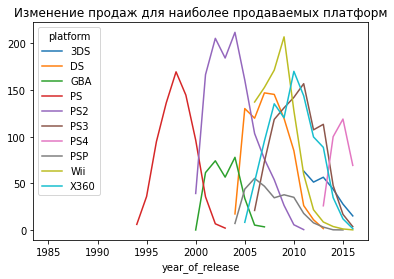

In [21]:
games.query('platform in @platform_top10').pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(
    legend=True, title='Изменение продаж для наиболее продаваемых платформ', style='-', )
plt.ioff()

На графике можно увидеть, что некоторые платформы были популярны достаточно давно, их заменили перевыпущенные более современные улучшенные платформы. Возьмем 5 наиболее продаваемых платформ за последние годы.

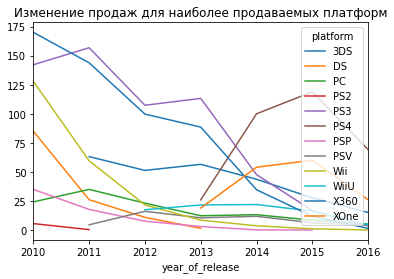

In [22]:
games.query('year_of_release >= 2010').pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(
    legend=True, title='Изменение продаж для наиболее продаваемых платформ', style='-', xlim=(2010, 2016))
plt.ioff()

In [23]:
threshold = 2

In [24]:
platform_top5 = games.query('year_of_release >= 2013 & total_sales >= @threshold').groupby(
    'platform')['total_sales'].sum().sort_values(ascending=False).head().index
platform_top5

Index(['PS4', '3DS', 'PS3', 'XOne', 'X360'], dtype='object', name='platform')

Исходя из того, что нам необходимо проанализировать данные для прогнозирования на 2017 год, возьмем для анализа актуальный период. Посчитаем среднюю продолжительность жизни платформы, проанализировав количество лет, когда продажи игр для платформы привышали 0.5 млн.

In [25]:
threshold = 0.5

In [26]:
platform_life = games.query('platform in @platform_top5').groupby(
    ['platform','year_of_release'])['total_sales'].mean().reset_index().query(
    'total_sales >= @threshold').groupby('platform')['year_of_release'].count().mean()
platform_life

5.4

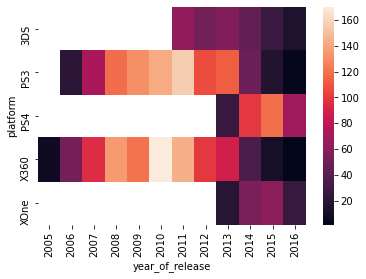

In [27]:
sn = games.query('platform in @platform_top5').pivot_table(
    index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
sns.heatmap(sn)
plt.ioff()

In [28]:
games_focused = games.query(
    'platform in @platform_top5 & year_of_release >= 2016-@platform_life/2') 
#возьмем за актуальный период половину средней продолжительности 

In [29]:
games_focused['platform'].unique() 
# игры на PS2 не вошли в данный срез, так как последний год выпуска игр на эту платформу 2011

array(['PS4', '3DS', 'XOne', 'PS3', 'X360'], dtype=object)

Построим график boxplot по глобальным продажам игр в разбивке по платформам.

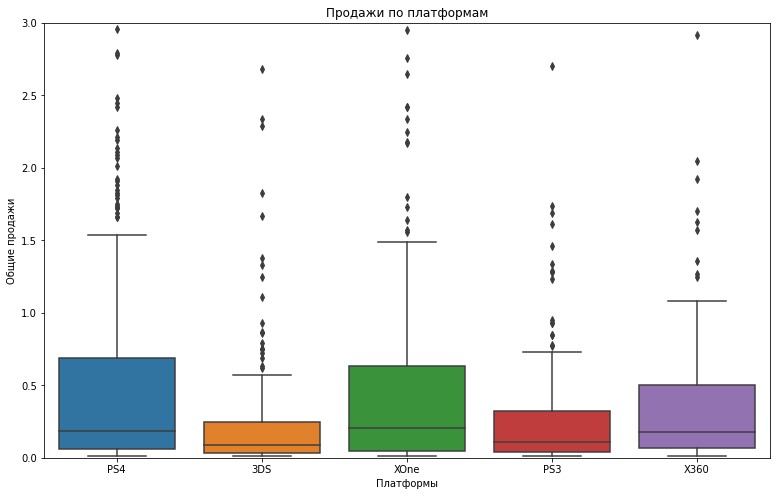

In [30]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = games_focused, y = 'total_sales', x='platform')
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show() # построим график с ограничением ylim, чтобы получше разглядеть "усы" квартили

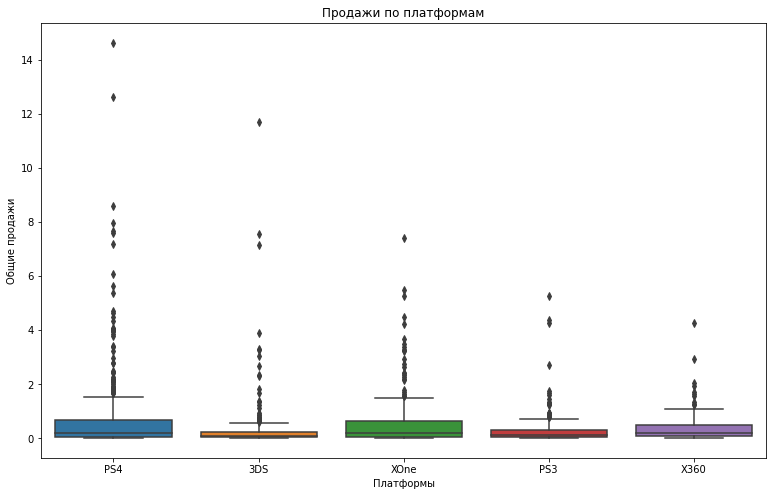

In [31]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = games_focused, y = 'total_sales', x='platform')
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))

plt.show() # построим график без ограничения ylim, чтобы увидеть выбросы в данных

По данным из boxplot можно с точностью сказать, что из 5 рассматриваемых платформ, самые высокие продажи были у PS4 и XONe.\
Медианы у всех рассматриваемых платформ ближе к нижнем квартилю. Следовательно, в исследуемом датасете рассматриваются игры с небольшими продажами и небольшим числом мегапопулярных игр. \
Максимум PS4 и XONe больше чем у остальных платформ, значит есть игры, продажи которых выше. \
Также можем проанализировать количество выбросов. Например, у PS4 естьнесколько очень популярных игр, которые со=ильно выбиваютс по продажам вверх.

Посмотрим, как влияют на продажи внутри одной из популярных платформ отзывы пользователей и критиков. Построим диаграмму рассеяния.

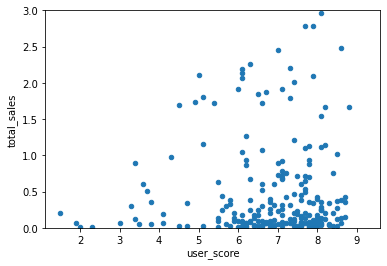

In [32]:
games_focused[games_focused['platform']=='PS4'].plot(x='user_score', y='total_sales', kind='scatter', ylim=(0,3))
plt.ioff()

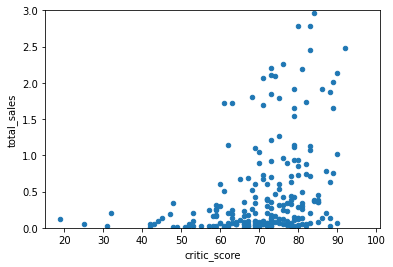

In [33]:
games_focused[games_focused['platform']=='PS4'].plot(x='critic_score', y='total_sales', kind='scatter', ylim=(0,3))
plt.ioff()

По графику  можно увидеть, что продаж больше у тех игр PS4, где оценка пользователей выше, но продажи есть и у игр с низкой пользовательской оценкой. Ярче зависимость видна между продажами и оценкой критиков. Там, где оценка меньше 60, высоких продаж нет. 

Посчитаем корреляцию между отзывами и продажами. Подтвердим графики 

In [34]:
games_focused[games_focused['platform']=='PS4']['critic_score'].corr(
    games_focused[games_focused['platform']=='PS4']['total_sales'])

0.40266141068104117

In [35]:
games_focused[games_focused['platform']=='PS4']['user_score'].corr(
    games_focused[games_focused['platform']=='PS4']['total_sales'])

-0.040131589472697266

По коэфициенту корреляции можем сделать вывод, что есть умеренная зависимость между количеством продаж и оценкой критиков. Чем больше оценка, тем выше продажи. А вот с оценкой пользователей и продажами явной связи нет, но утверждать о том, что связи нет совсем нельзя.

In [36]:
games_focused[games_focused['platform']=='X360']['critic_score'].corr(
    games_focused[games_focused['platform']=='X360']['total_sales'])

0.5257228356581521

In [37]:
games_focused[games_focused['platform']=='PS3']['critic_score'].corr(
    games_focused[games_focused['platform']=='PS3']['total_sales'])

0.44657460493190715

In [38]:
games_focused[games_focused['platform']=='3DS']['critic_score'].corr(
    games_focused[games_focused['platform']=='3DS']['total_sales'])

0.31411749286905094

In [39]:
games_focused[games_focused['platform']=='XOne']['critic_score'].corr(
    games_focused[games_focused['platform']=='XOne']['total_sales'])

0.428676943703332

Умеренная зависимость между оценкой критиков и продажами наблюдается и у остальных платформ. \
Корреляция продаж с отзывами критиков выше, чем с отзывами пользователей, так как отзывы пользователей не всегда являются критерием, по которому люди выбирают купить ли игру. Оценка пользователей более субъективная.

Посмотрим на общее распределение игр по жанрам.

In [40]:
games_focused.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
Action          175.17
Shooter         159.68
Sports          105.88
Role-Playing     88.95
Misc             26.32
Fighting         21.55
Racing           19.69
Adventure        14.47
Platform         10.97
Simulation        6.49
Strategy          1.49
Puzzle            0.93
Name: total_sales, dtype: float64

Самый продаваемый жанр - action. при этом есть наимение популярный жанр - паззлы. Примечательно, что отрыв от других жанров по продажам очень большой. Посмотрим на средние продажи по каждому жанру.

In [41]:
games_focused.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

genre
Shooter         1.550291
Sports          0.778529
Role-Playing    0.635357
Fighting        0.439796
Platform        0.421923
Action          0.415095
Racing          0.378654
Misc            0.350933
Simulation      0.282174
Adventure       0.152316
Puzzle          0.103333
Strategy        0.093125
Name: total_sales, dtype: float64

А вот по средним продажам жанр Action упал аж на шестое место! Теперь в топе остались Shooter, Sports и Role-Playing

In [42]:
games_focused.groupby('genre')['name'].count().sort_values(ascending=False)

genre
Action          422
Role-Playing    140
Sports          136
Shooter         103
Adventure        95
Misc             75
Racing           52
Fighting         49
Platform         26
Simulation       23
Strategy         16
Puzzle            9
Name: name, dtype: int64

Действительно, самые популярные жанры экшн, спорт и шутеры - самые продаваемые жанры, но и по количеству этих игр заметно больше, чем остальных. Также жанр паззлы представлен в срезе только в одной игре, поэтому продажи в общей таблице такие маленькие. Нельзя сделать вывод, что паззлы сильно непродаваемые, скорее всеготэто просто непопулярный жанр игр. \
В жанре action скорее всего выпущено много игр со средними продажами, именно поэтому он попадает в топ

## Портрет пользователя каждого региона

Рассмотрим пользователя каждого региона (NA, EU, JP)

**Самые популярные платформы (топ-5).**

Рассмотрим Северную Америку:

In [43]:
NA_platf = games_focused.groupby('platform')['NA_sales'].sum() / games_focused['NA_sales'].sum()
NA_platf

platform
3DS     0.089532
PS3     0.087199
PS4     0.389963
X360    0.111915
XOne    0.321390
Name: NA_sales, dtype: float64

Рассмотрим Европу:

In [44]:
EU_platf = games_focused.groupby('platform')['EU_sales'].sum() / games_focused['EU_sales'].sum()
EU_platf

platform
3DS     0.069054
PS3     0.109407
PS4     0.557060
X360    0.066355
XOne    0.198124
Name: EU_sales, dtype: float64

Рассмотрим Японию:

In [45]:
JP_platf = games_focused.groupby('platform')['JP_sales'].sum() / games_focused['JP_sales'].sum()
JP_platf

platform
3DS     0.624153
PS3     0.158296
PS4     0.211907
X360    0.001129
XOne    0.004515
Name: JP_sales, dtype: float64

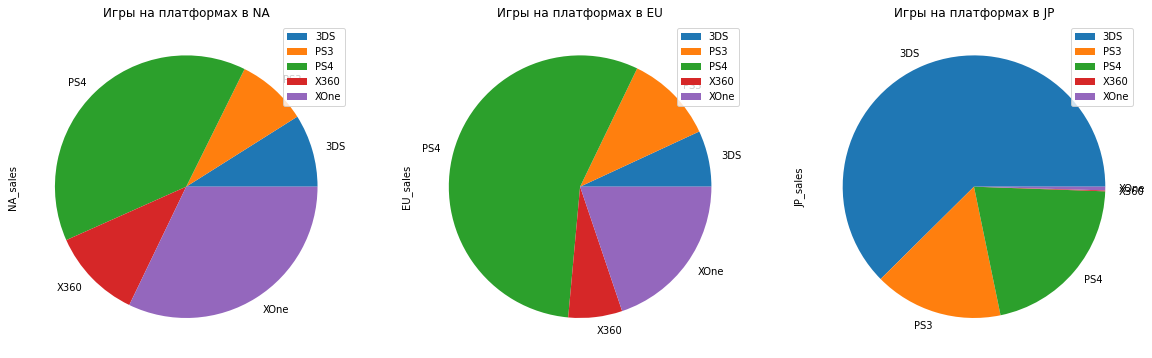

In [46]:
plt.subplots(figsize=(20,100))
regions = ['NA', 'EU', 'JP']
for i, region in enumerate(regions):
    column = '{}_sales'.format(region)
    region_platf = games_focused.groupby('platform').agg({column: 'sum'})/games_focused.agg({column: 'sum'})
    region_platf.plot(y=column, kind='pie', ax = plt.subplot(1, len(regions), i+1))
    plt.title('Игры на платформах в {}'.format(region))

В регионе NA самыми популярными были платформы XOne и PS4, они занимают 70% в регионе за выбранный период времени, остальная часть продаж делится между тремя платформами.

В Европе PS4 заметно превосходит над остальными платформами и занимает больше половины всех продаж. на втором месте стоит xOne

В регионе JP на XOne совсем не популярен. За то на 3DS приходится аж 62 процента продаж, заметно больше, чем в других регионах. Остальные продажи приходятся на платформы PS.

**Самые популярные жанры (топ-5).**

In [47]:
NA_genre = games_focused.groupby('genre')['NA_sales'].sum() / games_focused['NA_sales'].sum()
NA_genre

genre
Action          0.256535
Adventure       0.020603
Fighting        0.036501
Misc            0.044252
Platform        0.015344
Puzzle          0.000475
Racing          0.022106
Role-Playing    0.120457
Shooter         0.296991
Simulation      0.005616
Sports          0.179578
Strategy        0.001542
Name: NA_sales, dtype: float64

В Северной Америке самыми популярными являются экшн и шутер (почти половина от общих продаж), также популярность имеет жанр спорт.

In [48]:
EU_genre = games_focused.groupby('genre')['EU_sales'].sum() / games_focused['EU_sales'].sum()
EU_genre

genre
Action          0.281828
Adventure       0.025017
Fighting        0.022147
Misc            0.039196
Platform        0.019191
Puzzle          0.000557
Racing          0.048663
Role-Playing    0.104695
Shooter         0.259553
Simulation      0.010110
Sports          0.187971
Strategy        0.001071
Name: EU_sales, dtype: float64

в Европе распределение продаж по жанрав потчи то же, что и в Северной Америке. Но racing занимает долю больше, что ролевые игры, в отличие от NA

In [49]:
JP_genre = games_focused.groupby('genre')['JP_sales'].sum() / games_focused['JP_sales'].sum()
JP_genre

genre
Action          0.335638
Adventure       0.024972
Fighting        0.069554
Misc            0.040914
Platform        0.018623
Puzzle          0.009312
Racing          0.005502
Role-Playing    0.369780
Shooter         0.046981
Simulation      0.032026
Sports          0.035835
Strategy        0.010863
Name: JP_sales, dtype: float64

В Японии топ жанров отличается от Европы и Америки. После Экшна японцы предпочли ролевые игры и боевики, а только потом шутер и спорт. 

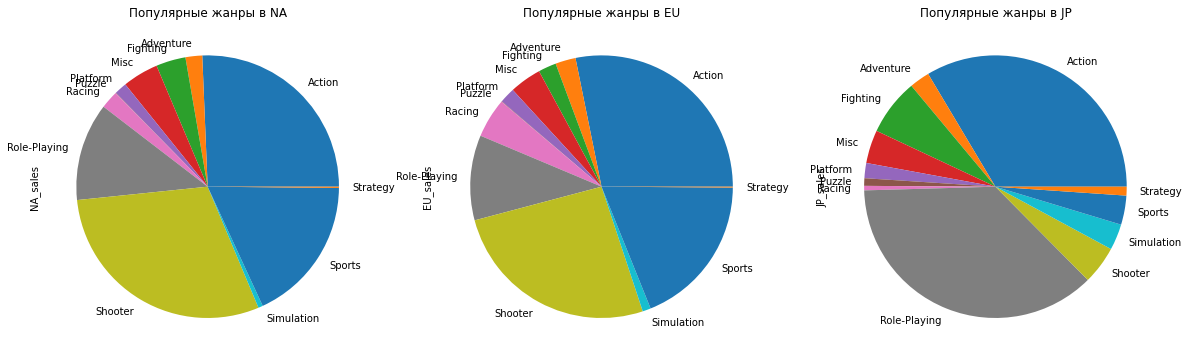

In [50]:
plt.subplots(figsize=(20,100))
regions = ['NA', 'EU', 'JP']
for i, region in enumerate(regions):
    column = '{}_sales'.format(region)
    region_genre = games_focused.groupby('genre').agg({column: 'sum'}) / games_focused.agg({column: 'sum'})
    region_genre.plot(y=column, kind='pie', legend=False, ax = plt.subplot(1, len(regions), i+1), normalize=True )
    plt.title('Популярные жанры в {}'.format(region))

Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для более понятной оценки заменим обозначения рейтинга на те возрастные ограничения, которым они соответствуют.

In [51]:
ESRB_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'unknown': 'Не известен'}
games_focused['ESRB_description'] = games_focused['rating'].map(ESRB_dict)

In [52]:
NA_ESRB = games_focused.groupby('ESRB_description')['NA_sales'].sum() / games_focused['NA_sales'].sum()
NA_ESRB

ESRB_description
13-19 лет      0.136078
> 17 лет       0.359157
>10 лет        0.099972
Для всех       0.167596
Не известен    0.237197
Name: NA_sales, dtype: float64

In [53]:
EU_ESRB = games_focused.groupby('ESRB_description')['EU_sales'].sum() / games_focused['EU_sales'].sum()
EU_ESRB

ESRB_description
13-19 лет      0.120288
> 17 лет       0.364205
>10 лет        0.077622
Для всех       0.211875
Не известен    0.226011
Name: EU_sales, dtype: float64

In [54]:
JP_ESRB = games_focused.groupby('ESRB_description')['JP_sales'].sum() / games_focused['JP_sales'].sum()
JP_ESRB

ESRB_description
13-19 лет      0.146163
> 17 лет       0.099182
>10 лет        0.033437
Для всех       0.077173
Не известен    0.644046
Name: JP_sales, dtype: float64

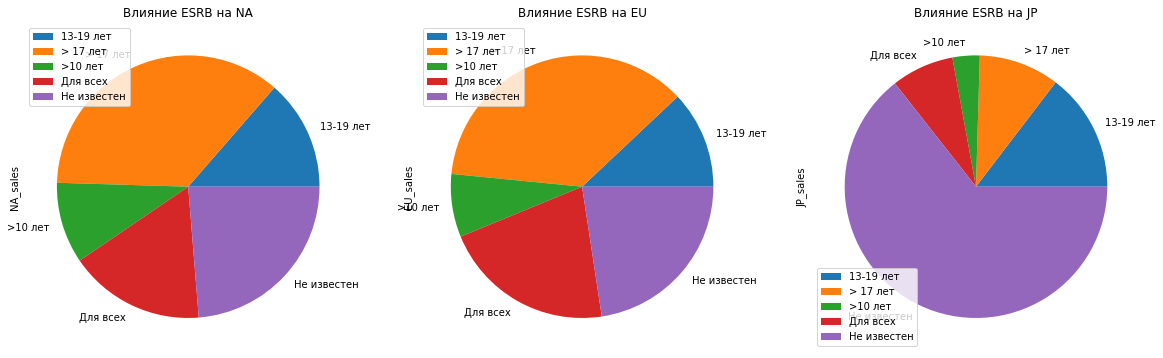

In [55]:
plt.subplots(figsize=(20,100))
regions = ['NA', 'EU', 'JP']
for i, region in enumerate(regions):
    column = '{}_sales'.format(region)
    region_ESRB = games_focused.groupby('ESRB_description').agg({column: 'sum'})
    region_ESRB.plot(y=column, kind='pie', ax = plt.subplot(1, len(regions), i+1))
    plt.title('Влияние ESRB на {}'.format(region))

Исходя из графиков выше можно заметить, что продаж больше у игр с рейтингом М как в Америке, так и в Европе. 
В Японии игр с неопределенным рейтингом очень много, поэтому они занимают чуть ли не половину всех продаж. Тем не менее на остальную половину приходятся игры рейтинга М и Т, их можно сичтать самым продаваемыми.

## Проверка гипотез

**Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

H0: Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу РС. \
H1: Средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу РС.

Данные гипотезы выбраны потому, что нам не важно больше или меньше рейтинг, мы проверяем именно равенство. Также в связи с этим, мы можем выбрать двустороннюю проверку гипотезы о равенстве среднего двух генеральных совокупностей по взятым выборкам

In [56]:
sample_xone = games_focused.query('platform == "XOne"')['user_score'].dropna()
sample_xone

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 165, dtype: float64

In [57]:
sample_ps = games_focused.query('platform == "PS"')['user_score'].dropna()
sample_ps

Series([], Name: user_score, dtype: float64)

In [58]:
alpha = .05 # возьмем порог 5%

In [59]:
results = st.ttest_ind(sample_xone, sample_ps, equal_var = False)
results.pvalue

nan

In [60]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Не отвергаем нулевую гипотезу


Не отвергаем нулевую гипотезу о том, что средний пользовательский рейтинг xone и PS равен.

**Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные**

H0: Средний пользовательский рейтинг игр жанра Action равен среднему пользовательскому рейтингу игр жанра Sports. \
H1: Средний пользовательский рейтинг игр жанра Action не равен среднему пользовательскому рейтингу игр жанра Sports.

Данные гипотезы выбраны потому, что мы проверяем то, что рейтенги не равны. Соответственно нам важно, подтвердится ли альтернативная гипотеза. Также в связи с этим, мы выберем двустороннюю проверку гипотезы о равенстве среднего двух генеральных совокупностей по взятым выборкам.

In [61]:
sample_action = games_focused.query('genre == "Action"')['user_score'].dropna()
sample_sports = games_focused.query('genre == "Sports"')['user_score'].dropna()

In [62]:
results2 = st.ttest_ind(sample_action, sample_sports, equal_var = False)
results2.pvalue

5.038289845973773e-12

In [63]:
if results2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Отвергаем нулевую гипотезу


Снова отвергаем нулевую гипотезу. А это значит, что средние пользовательские рейтинги для выбранных жанров статистически значимо различаются.

## Общий вывод

В данном проекте мы исследовали продажи игр различных платформ для планирования рекламных кампаний на 2017 год. \
Мы взяли данные за актуальный период с 2013 по 2016 год и самые популярные на этот момент платформы PS4', '3DS', 'PS3', 'XOne', 'X360'.

**Анализ корреляций**

Из результатов исследования было выяснено, что глобавльные продажи в рассматриваемом промежутке времени у платформ PS4 и XONe были в разы выше других.\
При этом продажи имели прямую зависимость от оценок критиков. У игр, где оценка высокая, продаж было значительно больше. А вот оценка пользователей на продажи явно не влияет.

**Работа с данными**

Самыми популярными платформами для Америки и Европы были PS4 и XOne. При чем в регионе JP XOne совсем не популярен. За то на 3DS приходится аж 62 процента продаж, заметно больше, чем в других регионах.

Также были исследованы популярные жанры в играх на игровые платформы. В топ самых популярных жанров для Америки и Европы вошли: Action, Shooter, Sports. В Японии топ жанров отличается от Европы и Америки. После Экшна японцы предпочли ролевые игры и боевики, а только потом шутер и спорт. 

Если смотреть на популярные жанры по регионам, то с точностью можно сказать, что во всех трех исследуемых регионах на первом месте по продажам стоят игры жанра Action. А вот потом в топе идут различия.В Европе распределение продаж по жанрав потчи то же, что и в Северной Америке. Но racing занимает долю больше, что ролевые игры, в отличие от NA \
А вот в Японии на втором месте по популярности стоят ролевые игры (примерно та же доля игр, что и action), после чего Fighting.

Также было исследовано влияние ESRB на продажи в каждом регионе. Было выявлено, что продаж больше у игр с рейтингом 17+ как в Америке, так и в Европе. 
В Японии игр с неопределенным рейтингом очень много, поэтому они занимают чуть ли не половину всех продаж. Тем не менее на остальную половину приходятся игры рейтинга 17+ и 13-19 лет, их можно сичтать самым продаваемыми.

**Проверка гипотез**

Была проведена проверка гипотез о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые и что средние пользовательские рейтинги жанров Action и Sports разные. \
Первая гипотеза не была опровергнута. Средний рейтинг пользователей платформ Xbox One и PC статистически одинаков в исследуемой выборке. \
Вторая гипотеза подтвердилась. Средние пользовательские рейтинги жанров Action и Sports и правда оказались разные.

**Рекомендации магазину видеоигр**

По выводам, сделанным из исследования, можно порекомендовать магазину видеоигр сконцентрировать свое внимание на платформах Xbox One и PS4, так как это самые популярные платформы в Европе и Америке. Если же магазин продает игры в Японии, то нужно учесть различия и сфокусироваться на платформе 3DS. \
Что касается жанров игр, определенно необходимо уделить внимание играм жанра Action. Далее опять же смотреть в зависимости от региона продаж. В Японии стоит взять также игры жанра Role-Playing, а в Америке и Европе Shooter и Sports.